## Data

In [1]:
# Get data
with open("/home/van-thiep/Downloads/Code/NLP/Data/sherlock_holmes_1.txt",'r') as f:
    document = f.read()

In [5]:
print(document)

To Sherlock Holmes she is always _the_ woman. I have seldom heard him
mention her under any other name. In his eyes she eclipses and
predominates the whole of her sex. It was not that he felt any emotion
akin to love for Irene Adler. All emotions, and that one particularly,
were abhorrent to his cold, precise but admirably balanced mind. He
was, I take it, the most perfect reasoning and observing machine that
the world has seen, but as a lover he would have placed himself in a
false position. He never spoke of the softer passions, save with a gibe
and a sneer. They were admirable things for the observer—excellent for
drawing the veil from men’s motives and actions. But for the trained
reasoner to admit such intrusions into his own delicate and finely
adjusted temperament was to introduce a distracting factor which might
throw a doubt upon all his mental results. Grit in a sensitive
instrument, or a crack in one of his own high-power lenses, would not
be more disturbing than a strong em

In [2]:
import nltk
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
from nltk.util import bigrams
from nltk.collocations import BigramCollocationFinder

## Collecting text data

- Electronic book 
- Web page content 
- Search engine results (Google) 
- RSS feeds 
- PDF, Word and other binary formats 
- User input 

## Accessing text corpora
A text corpus is a large body of text.
- from nltk.corpus import gutenberg, webtext, nps_chat, brown

    + **gutenberg**: a small selection of texts from the Project Gutenberg electronic text
archive, which contains some 25,000 free electronic books

    + **webtext**: NLTK’s small collection of web text includes content from a Firefox discussion forum, conversations
overheard in New York, the movie script of Pirates of the Carribean, personal adver-
tisements, and wine reviews (less formal language than book such as gutenberg)

    + **nps_chat**: a corpus of instant messaging chat sessions

    + **brown**: The Brown Corpus was the first million-word electronic corpus of English, created in
1961 at Brown University. This corpus contains text from 500 sources, and the sources
have been categorized by genre, such as news, editorial, and so on

    + ....

- Method
     + gutenberg.**fileids()**: return a list of text file in corpus
     + gutenberg.**words(file_id:str)**: return a list of words in fileid
     + gutenberg.**sents()**, gutenberg.**raw()**
     + ....

![Common structure for text copora](https://www.nltk.org/images/text-corpus-structure.png)

## Lexical resources

Lexical resources is a collection of words and/or phrases along with associated information, such as part-of-speech, pronunciation and sense defination.

- **wordlist copora**: from nltk.corpus import words, stopwords

We can use it to remove unusual and misspelled words.

- **A pronunciation dictionary**: from nltk.corpus import cmudict

It's usually designed for speech.

- **Toolbox lexicons**

- **Wordnet**:from nltk.corpus import wordnet

WordNet is a semantically oriented dictionary of English, consisting of synonym sets or synsets and organized into a network.

## Processing raw text

### String method

![](https://miro.medium.com/max/866/1*m2e4Z2uV06JIrGVEpLLb7w.png)

### Regular expression

### Normalizing text

- [Stemmers](https://www.nltk.org/howto/stem.html)

- [Lemmetization](https://www.nltk.org/api/nltk.stem.wordnet.html)

### Re for tokenizing text

Using regular expression for tokenizing text allows you to have much more control over the process.

# Tokenize 
- nltk.tokenize.sent_tokenize(document)
- nltk.tokenize.word_tokenize(document): Output is a list, where each token is either a word or a puctuation mark.


In [11]:
list_words = word_tokenize(document)
print(list_words[:10])

['To', 'Sherlock', 'Holmes', 'she', 'is', 'always', '_the_', 'woman', '.', 'I']


## Simple statistic

- nltk.probability.FreqDist(list_words)
- [nltk.probability.ConditionalFreqDist](https://www.nltk.org/api/nltk.probability.html?highlight=conditionalfreqdist#nltk.probability.ConditionalFreqDist): receive list of tuple (condition,event) such as (caterory, word) as input. This will allow us to study systematic differences between the categories.
- nltk.util.bigrams(list_words)
- [nltk.collocations](https://www.nltk.org/howto/collocations.html)

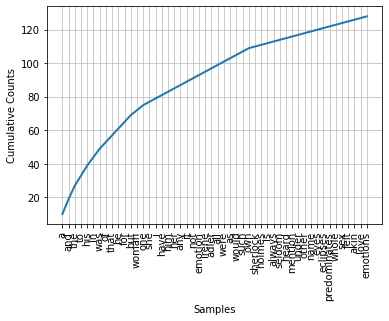

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [34]:
freq = FreqDist(word.lower() for word in word_tokenize(document) if word.isalpha())
freq.plot(50,cumulative=True)

In [35]:
print(sorted(freq.items(), key=lambda x:x[1], reverse=True))

[('a', 10), ('and', 9), ('the', 8), ('to', 6), ('his', 6), ('in', 5), ('was', 5), ('of', 4), ('that', 4), ('he', 4), ('for', 4), ('but', 4), ('woman', 3), ('one', 3), ('she', 2), ('i', 2), ('have', 2), ('him', 2), ('her', 2), ('any', 2), ('it', 2), ('not', 2), ('emotion', 2), ('irene', 2), ('adler', 2), ('all', 2), ('were', 2), ('as', 2), ('would', 2), ('such', 2), ('own', 2), ('sherlock', 1), ('holmes', 1), ('is', 1), ('always', 1), ('seldom', 1), ('heard', 1), ('mention', 1), ('under', 1), ('other', 1), ('name', 1), ('eyes', 1), ('eclipses', 1), ('predominates', 1), ('whole', 1), ('sex', 1), ('felt', 1), ('akin', 1), ('love', 1), ('emotions', 1), ('particularly', 1), ('abhorrent', 1), ('cold', 1), ('precise', 1), ('admirably', 1), ('balanced', 1), ('mind', 1), ('take', 1), ('most', 1), ('perfect', 1), ('reasoning', 1), ('observing', 1), ('machine', 1), ('world', 1), ('has', 1), ('seen', 1), ('lover', 1), ('placed', 1), ('himself', 1), ('false', 1), ('position', 1), ('never', 1), ('sp

In [4]:
from nltk.probability import ConditionalFreqDist
cfdist = ConditionalFreqDist((len(word),word) for word in word_tokenize(document))
cfdist[3]

FreqDist({'and': 8, 'the': 8, 'his': 6, 'was': 5, 'for': 4, 'one': 3, 'but': 3, 'she': 2, 'him': 2, 'her': 2, ...})

In [22]:
print(list(bigrams(list_words))[:10])

[('To', 'Sherlock'), ('Sherlock', 'Holmes'), ('Holmes', 'she'), ('she', 'is'), ('is', 'always'), ('always', '_the_'), ('_the_', 'woman'), ('woman', '.'), ('.', 'I'), ('I', 'have')]


In [28]:
from nltk.collocations import *
# score ngram according to some association measures
biagram_measure = nltk.collocations.BigramAssocMeasures()
# Defind finder
finder = BigramCollocationFinder.from_words(list_words)
# only get ngram appearing more than 2 times
finder.apply_freq_filter(0)
# use Pointwise Mutual Information(pmi) to scrore ngram
finder.nbest(biagram_measure.pmi, 10)

[('All', 'emotions'),
 ('And', 'yet'),
 ('Sherlock', 'Holmes'),
 ('To', 'Sherlock'),
 ('adjusted', 'temperament'),
 ('admirable', 'things'),
 ('admirably', 'balanced'),
 ('always', '_the_'),
 ('balanced', 'mind'),
 ('be', 'more')]

## Tagging words